## no SD for binomial variable
## cross validation`

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.decomposition import PCA
from sklearn.metrics import *
import pandas_profilling as pp

%matplotlib inline

ModuleNotFoundError: No module named 'pandas_profilling'

In [13]:
# define path to the data file

filepath='O365 Home Data/Buy_Try_Data.csv'

In [16]:
# Data ingestion

df = pd.read_csv(filepath)
df.head()

,MC1ID,Paid Orders Exists,Free Orders Exists,Visits,New Visitors Exists,Return Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,...,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,Link Clicks on tab-OverviewTab,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link,RPV
0,77d20fbd617eba42a48d01822684da62,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,333.0,7.5,86.0,0,0,0,0,0,0,99.99
1,dd23dfffa72e41de888cb7df3990b1d2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,370.0,NaN,31.0,0,0,0,0,0,0,9.99
2,23676d54473c4bf5b8844b02cc5971a5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1440.0,72.0,56.0,0,0,0,0,0,0,55.00
3,efe1dd5a57f94ec585bca628a00dc1e5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,242.0,NaN,42.0,0,0,0,0,0,0,149.99
4,6f018a3ff7e7486abb340d09d37385a9,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,1.0,0,0,0,0,0,0,6.99


## Exploratory Data Analysis (EDA)


In [17]:
df.shape

(518, 23)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 23 columns):
MC1ID                                   516 non-null object
Paid Orders Exists                      516 non-null float64
Free Orders Exists                      516 non-null float64
Visits                                  516 non-null float64
New Visitors Exists                     516 non-null float64
Return Visitors Exists                  516 non-null float64
Enter from Office.com                   516 non-null float64
Enter from Store                        516 non-null float64
Enter from O365 Web                     516 non-null float64
Traffic Channel O&O                     516 non-null float64
Traffic Channel Direct                  516 non-null float64
Traffic Channel Organic Search          516 non-null float64
Traffic Channel Paid Search             516 non-null float64
Time Spent per Visit (seconds)          500 non-null float64
Average Time Spent on Page (seconds)    16

In [19]:
df.describe()

,Paid Orders Exists,Free Orders Exists,Visits,New Visitors Exists,Return Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,...,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,Link Clicks on tab-OverviewTab,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link,RPV
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,...,500.000000,169.000000,516.000000,518.0,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,0.784884,0.215116,1.023256,0.608527,0.391473,0.046512,0.362403,0.317829,0.354651,0.310078,...,605.123000,123.158553,33.335271,0.0,0.013514,0.009653,0.009653,0.256757,0.119691,45.696660
std,0.411302,0.411302,0.223481,0.488553,0.488553,0.210795,0.493119,0.470232,0.494825,0.471287,...,797.578225,320.616281,29.173169,0.0,0.115571,0.145545,0.097866,0.795115,0.906221,56.257701
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,12.000000,13.750000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.990000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,291.500000,25.000000,25.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9.990000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,825.500000,60.000000,44.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,99.990000
max,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,...,6263.000000,2615.000000,254.000000,0.0,1.000000,3.000000,1.000000,11.000000,17.000000,449.970000


In [20]:
pp.ProfileReport(df)

NameError: name 'pp' is not defined

In [21]:
df['Paid Orders Exists'].value_counts()

1.0    405
0.0    111
Name: Paid Orders Exists, dtype: int64

In [22]:
df['Free Orders Exists'].value_counts()

0.0    405
1.0    111
Name: Free Orders Exists, dtype: int64

## Remove outliers and fill missing data

## Link Clicks

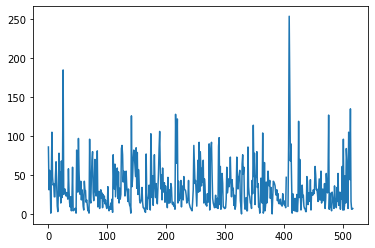

In [23]:
plt.plot(df['Link Clicks'])

In [24]:
idx =df.index[df['Link Clicks']>145]

In [25]:
idx.tolist()

[25, 409, 410]

In [26]:
df.drop(idx.tolist(), inplace= True)

### Time Spent per Visit (seconds)

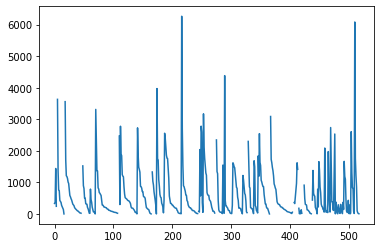

In [27]:
plt.plot(df['Time Spent per Visit (seconds)'])

In [28]:
idx =df.index[df['Time Spent per Visit (seconds)']>4500]
idx.tolist()

[216, 510]

In [29]:
df.drop(idx.tolist(), inplace= True)

### Average Time Spent on Page (seconds)

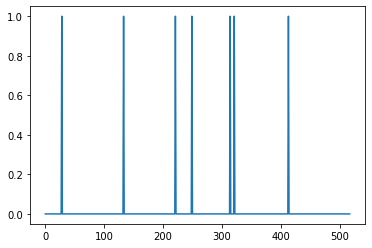

In [30]:
plt.plot(df['Link Clicks on tab-TechSpecsTab'])

### Link Clicks on ReviewTab

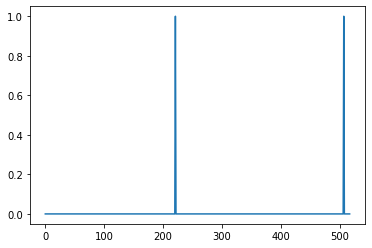

In [31]:
plt.plot(df['Link Clicks on tab-ReviewsTab'])

### Link Clicks on FAQTab

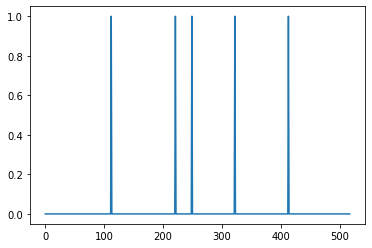

In [32]:
plt.plot(df['Link Clicks on tab-FAQTab'])

### Link Clicks on AddtoCartButton

In [33]:
df.columns

Index(['MC1ID', 'Paid Orders Exists', 'Free Orders Exists', 'Visits',
       'New Visitors Exists', 'Return Visitors Exists',
       'Enter from Office.com', 'Enter from Store', 'Enter from O365 Web',
       'Traffic Channel O&O', 'Traffic Channel Direct',
       'Traffic Channel Organic Search', 'Traffic Channel Paid Search',
       'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks',
       'Link Clicks on tab-OverviewTab', 'Link Clicks on tab-TechSpecsTab',
       'Link Clicks on tab-ReviewsTab', 'Link Clicks on tab-FAQTab',
       'Link Clicks on AddToCartButton', 'Link Clicks on Try Link', 'RPV'],
      dtype='object')

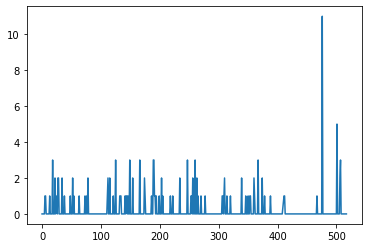

In [34]:
plt.plot(df['Link Clicks on AddToCartButton'])

In [35]:
idx = df.index[df['Link Clicks on AddToCartButton']>3]

In [36]:
idx.tolist()
df.drop(idx.tolist(), inplace=True)

### Link Clicks on Try Link

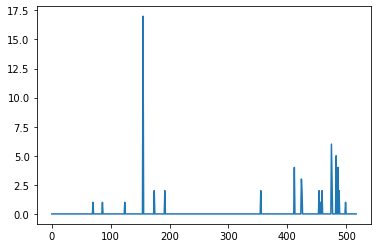

In [37]:
plt.plot(df['Link Clicks on Try Link'])

In [38]:
idx = df.index[df['Link Clicks on Try Link']>2]
idx

Int64Index([155, 412, 424, 475, 483, 486], dtype='int64')

In [39]:
df.drop(idx.tolist(), inplace=True)
df.shape

(505, 23)

### Enter from O365 Web

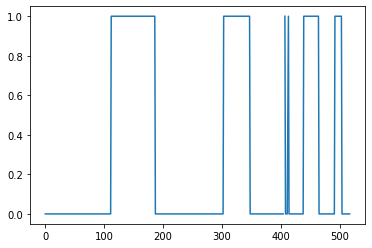

In [40]:
plt.plot(df['Enter from O365 Web'])

In [41]:
idx = df.index[df['Enter from O365 Web']>1]
idx

Int64Index([], dtype='int64')

In [42]:
df.drop(idx.tolist(), inplace=True)
df.shape

(505, 23)

### nter from Office.com

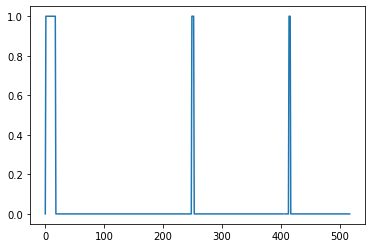

In [43]:
plt.plot(df['Enter from Office.com'])

## Enter from Store

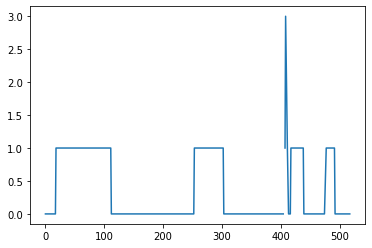

In [44]:
plt.plot(df['Enter from Store'])

In [45]:
idx = df.index[df['Enter from Store']>1]
idx

Int64Index([408], dtype='int64')

In [46]:
df.drop(idx.tolist(), inplace=True)
df.shape

(504, 23)

### Traffic Channel

In [47]:
idx = df.index[df['Traffic Channel Direct']>1]
df.drop(idx.tolist(), inplace=True)
df.shape

idx = df.index[df['Traffic Channel O&O']>1]
df.drop(idx.tolist(), inplace=True)
df.shape

idx = df.index[df['Traffic Channel Organic Search']>1]
df.drop(idx.tolist(), inplace=True)
df.shape

idx = df.index[df['Traffic Channel Paid Search']>1]
df.drop(idx.tolist(), inplace=True)
df.shape

(501, 23)

### Visits

In [48]:
idx = df.index[df['Visits']>1]
df.drop(idx.tolist(), inplace=True)
df.shape

(500, 23)

### Count Plot

In [49]:
df.shape

(500, 23)

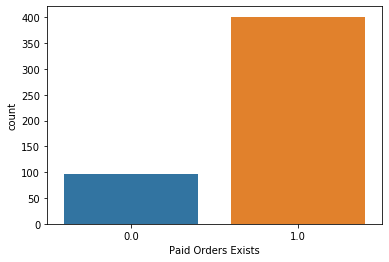

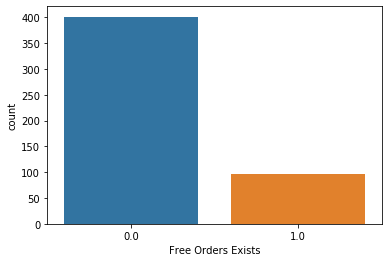

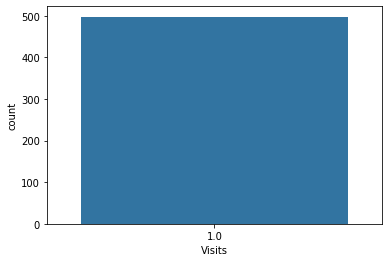

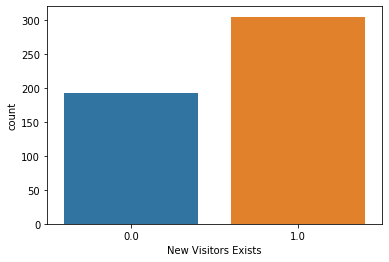

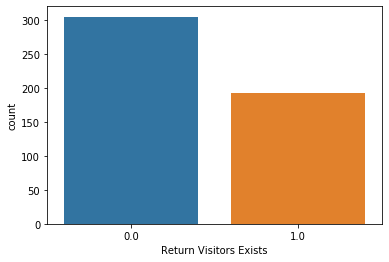

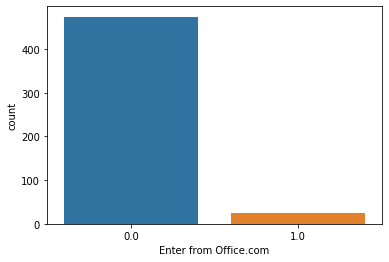

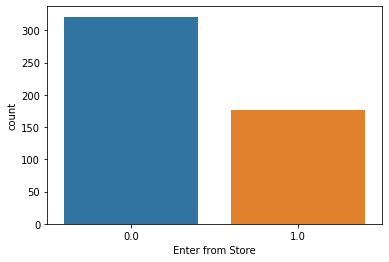

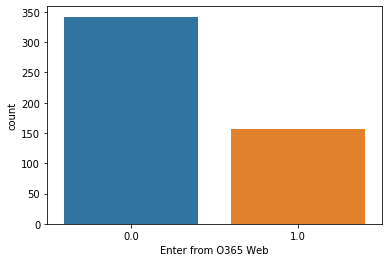

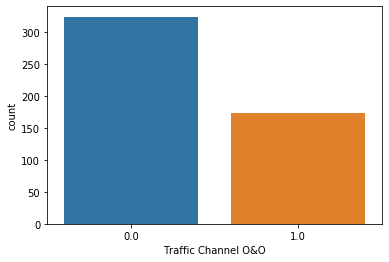

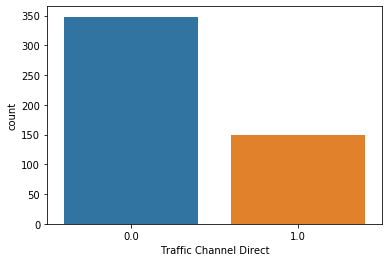

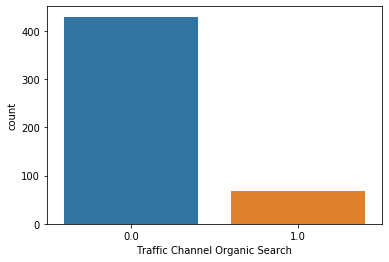

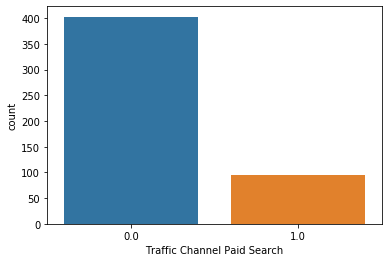

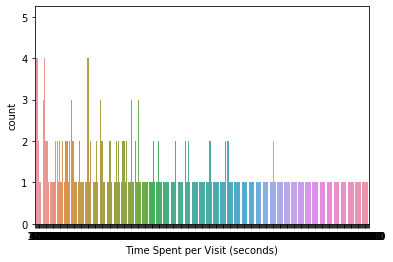

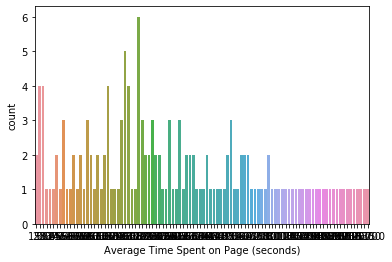

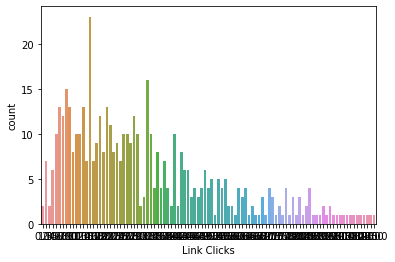

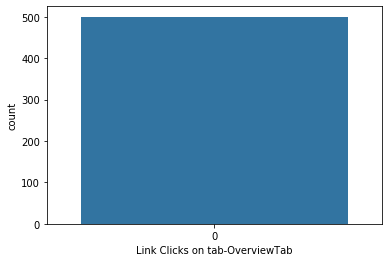

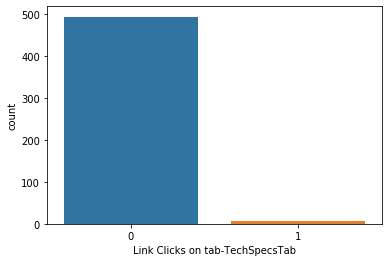

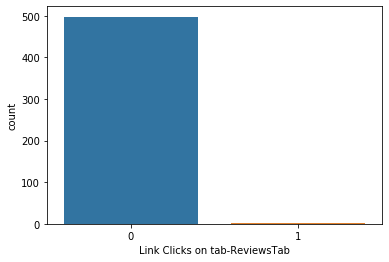

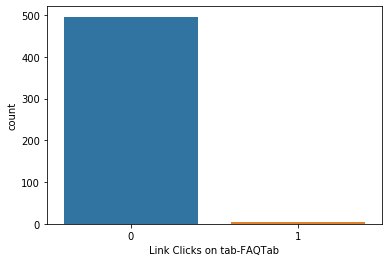

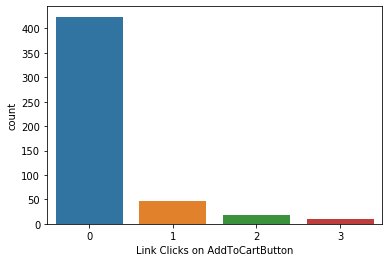

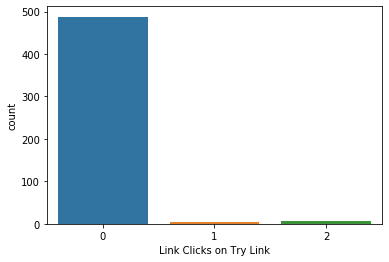

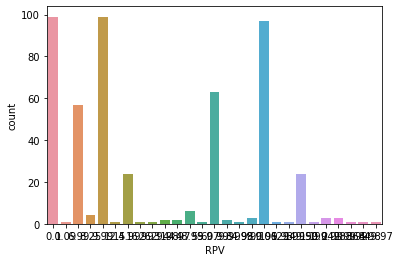

In [50]:
for c in range(1,23):
    sns.countplot(df.iloc[:,c])
    plt.show()

In [51]:
df['Paid Orders Exists'].value_counts()

1.0    401
0.0     97
Name: Paid Orders Exists, dtype: int64

In [52]:
df['Free Orders Exists'].value_counts()

0.0    401
1.0     97
Name: Free Orders Exists, dtype: int64

In [53]:
df.columns

Index(['MC1ID', 'Paid Orders Exists', 'Free Orders Exists', 'Visits',
       'New Visitors Exists', 'Return Visitors Exists',
       'Enter from Office.com', 'Enter from Store', 'Enter from O365 Web',
       'Traffic Channel O&O', 'Traffic Channel Direct',
       'Traffic Channel Organic Search', 'Traffic Channel Paid Search',
       'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks',
       'Link Clicks on tab-OverviewTab', 'Link Clicks on tab-TechSpecsTab',
       'Link Clicks on tab-ReviewsTab', 'Link Clicks on tab-FAQTab',
       'Link Clicks on AddToCartButton', 'Link Clicks on Try Link', 'RPV'],
      dtype='object')

## Correlation among the features

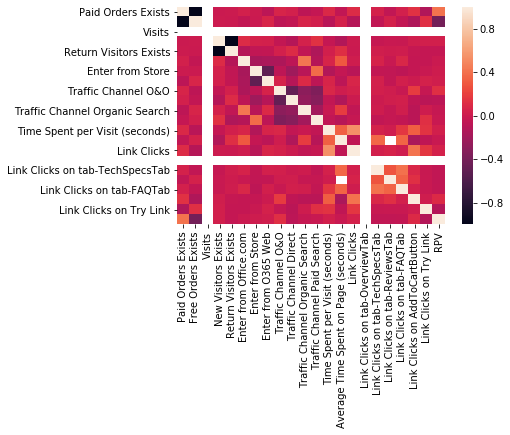

In [54]:
sns.heatmap(df.corr())

In [55]:
df_corr = df.corr()
df_corr.head()

,Paid Orders Exists,Free Orders Exists,Visits,New Visitors Exists,Return Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,...,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,Link Clicks on tab-OverviewTab,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link,RPV
Paid Orders Exists,1.000000,-1.000000,NaN,-0.006165,0.006165,0.039647,0.005041,-0.072309,0.062655,0.046604,...,0.090298,-0.052610,0.104822,NaN,0.054313,-0.048940,0.044257,0.135899,-0.125461,0.409723
Free Orders Exists,-1.000000,1.000000,NaN,0.006165,-0.006165,-0.039647,-0.005041,0.072309,-0.062655,-0.046604,...,-0.090298,0.052610,-0.104822,NaN,-0.054313,0.048940,-0.044257,-0.135899,0.125461,-0.409723
Visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Visitors Exists,-0.006165,0.006165,NaN,1.000000,-1.000000,0.102019,0.048191,0.039614,-0.039474,-0.106616,...,-0.035556,-0.119334,0.002662,NaN,-0.025489,-0.014657,-0.020769,0.024036,0.038265,0.036172
Return Visitors Exists,0.006165,-0.006165,NaN,-1.000000,1.000000,-0.102019,-0.048191,-0.039614,0.039474,0.106616,...,0.035556,0.119334,-0.002662,NaN,0.025489,0.014657,0.020769,-0.024036,-0.038265,-0.036172


In [56]:
df_corr.loc[(df_corr['Paid Orders Exists']>0.05) | (df_corr['Paid Orders Exists']<-0.05),'Paid Orders Exists']

Paid Orders Exists                      1.000000
Free Orders Exists                     -1.000000
Enter from O365 Web                    -0.072309
Traffic Channel O&O                     0.062655
Traffic Channel Organic Search         -0.070216
Time Spent per Visit (seconds)          0.090298
Average Time Spent on Page (seconds)   -0.052610
Link Clicks                             0.104822
Link Clicks on tab-TechSpecsTab         0.054313
Link Clicks on AddToCartButton          0.135899
Link Clicks on Try Link                -0.125461
RPV                                     0.409723
Name: Paid Orders Exists, dtype: float64

In [57]:
( df_corr[(df_corr>0.05) | (df_corr<-0.05)])

,Paid Orders Exists,Free Orders Exists,Visits,New Visitors Exists,Return Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,...,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,Link Clicks on tab-OverviewTab,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link,RPV
Paid Orders Exists,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,-0.072309,0.062655,NaN,...,0.090298,-0.052610,0.104822,NaN,0.054313,NaN,NaN,0.135899,-0.125461,0.409723
Free Orders Exists,-1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.072309,-0.062655,NaN,...,-0.090298,0.052610,-0.104822,NaN,-0.054313,NaN,NaN,-0.135899,0.125461,-0.409723
Visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Visitors Exists,NaN,NaN,NaN,1.000000,-1.000000,0.102019,NaN,NaN,NaN,-0.106616,...,NaN,-0.119334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Return Visitors Exists,NaN,NaN,NaN,-1.000000,1.000000,-0.102019,NaN,NaN,NaN,0.106616,...,NaN,0.119334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enter from Office.com,NaN,NaN,NaN,0.102019,-0.102019,1.000000,-0.167090,-0.151973,-0.145235,-0.065987,...,0.064273,0.300324,NaN,NaN,0.061087,NaN,0.084789,NaN,NaN,NaN
Enter from Store,NaN,NaN,NaN,NaN,NaN,-0.167090,1.000000,-0.501514,-0.069015,-0.204041,...,-0.117452,NaN,-0.089397,NaN,NaN,NaN,-0.066819,NaN,NaN,NaN
Enter from O365 Web,-0.072309,0.072309,NaN,NaN,NaN,-0.151973,-0.501514,1.000000,0.058968,-0.094253,...,0.068177,-0.071412,0.076280,NaN,NaN,NaN,NaN,NaN,0.051838,NaN
Traffic Channel O&O,0.062655,-0.062655,NaN,NaN,NaN,-0.145235,-0.069015,0.058968,1.000000,-0.481125,...,0.080585,NaN,0.050434,NaN,NaN,NaN,NaN,0.184604,NaN,0.125369
Traffic Channel Direct,NaN,NaN,NaN,-0.106616,0.106616,-0.065987,-0.204041,-0.094253,-0.481125,1.000000,...,NaN,-0.129376,NaN,NaN,NaN,NaN,NaN,-0.061794,-0.081200,-0.076778


## Date Preparation from Buy+Try Rows

### Remove correlated columns before feature engineering

In [58]:
df_buy_try_temp = df
df_buy_try_temp.shape

(500, 23)

In [59]:
df_buy_try_temp.head()

,MC1ID,Paid Orders Exists,Free Orders Exists,Visits,New Visitors Exists,Return Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,...,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,Link Clicks on tab-OverviewTab,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link,RPV
1,dd23dfffa72e41de888cb7df3990b1d2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,370.0,NaN,31.0,0,0,0,0,0,0,9.99
2,23676d54473c4bf5b8844b02cc5971a5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1440.0,72.0,56.0,0,0,0,0,0,0,55.00
3,efe1dd5a57f94ec585bca628a00dc1e5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,242.0,NaN,42.0,0,0,0,0,0,0,149.99
4,6f018a3ff7e7486abb340d09d37385a9,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,1.0,0,0,0,0,0,0,6.99
5,1820d4fa82034ce7ba215ab9bc03b972,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3630.0,15.0,50.0,0,0,0,0,1,0,9.99


In [60]:
## drop correlated cols
cols_to_drop=['MC1ID','Free Orders Exists', 'Visits','Return Visitors Exists','Link Clicks on tab-OverviewTab', 'RPV']

df_buy_try_prep = df_buy_try_temp.drop(cols_to_drop, axis=1)
df_buy_try_prep.head()

,Paid Orders Exists,New Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,Traffic Channel Organic Search,Traffic Channel Paid Search,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,370.0,NaN,31.0,0,0,0,0,0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1440.0,72.0,56.0,0,0,0,0,0
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,242.0,NaN,42.0,0,0,0,0,0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,1.0,0,0,0,0,0
5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3630.0,15.0,50.0,0,0,0,1,0


In [61]:
# table continuous variables for Standard Scale
cols_to_ss=['Time Spent per Visit (seconds)','Average Time Spent on Page (seconds)', 'Link Clicks']

df_buy_try_no_cat = df_buy_try_prep[cols_to_ss]
df_buy_try_no_cat.head()

,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks
1,370.0,NaN,31.0
2,1440.0,72.0,56.0
3,242.0,NaN,42.0
4,NaN,NaN,1.0
5,3630.0,15.0,50.0


### Fill missing values with Mean

In [62]:
df_buy_try_no_cat.fillna(df_buy_try_no_cat.mean(), inplace=True)
df_buy_try_no_cat.head()

/Users/sulbha/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks
1,370.000000,119.095161,31.0
2,1440.000000,72.000000,56.0
3,242.000000,119.095161,42.0
4,571.829876,119.095161,1.0
5,3630.000000,15.000000,50.0


In [63]:
df_buy_try_no_cat.shape

(500, 3)

## Standard Scaler 

In [64]:
ss = StandardScaler()

np_buy_try_tranform = ss.fit_transform(df_buy_try_no_cat)

data = np_buy_try_tranform.tolist()
cols_transform = df_buy_try_no_cat.columns
df_buy_try_standard = pd.DataFrame(data,columns=cols_transform ) 
df_buy_try_standard.head()

,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks
0,-0.287570,-1.607611e-16,-0.014009
1,1.236983,-2.663834e-01,0.994120
2,-0.469947,-1.607611e-16,0.429568
3,0.000000,-1.607611e-16,-1.223763
4,4.357330,-5.887913e-01,0.752169


In [65]:
df_buy_try_standard.shape

(500, 3)

## append categorical back to scaler

In [66]:
# drop categorical variables
cols_to_ss=['Time Spent per Visit (seconds)','Average Time Spent on Page (seconds)', 'Link Clicks']

for c in df_buy_try_prep.columns:
    if c not in cols_to_ss and c!='Paid Orders Exists':
        df_buy_try_standard[c] = df_buy_try_prep[c]
df_buy_try_standard.head()

,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,New Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,Traffic Channel Organic Search,Traffic Channel Paid Search,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link
0,-0.287570,-1.607611e-16,-0.014009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.236983,-2.663834e-01,0.994120,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.469947,-1.607611e-16,0.429568,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,-1.607611e-16,-1.223763,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.357330,-5.887913e-01,0.752169,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df_buy_try_standard.fillna(0, inplace=True)
df_buy_try_standard.head()

,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,New Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,Traffic Channel Organic Search,Traffic Channel Paid Search,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link
0,-0.287570,-1.607611e-16,-0.014009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.236983,-2.663834e-01,0.994120,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.469947,-1.607611e-16,0.429568,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,-1.607611e-16,-1.223763,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.357330,-5.887913e-01,0.752169,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df_buy_try_standard.shape

(500, 16)

## switch column orders

In [69]:
cols = df_buy_try_standard.columns
#cols = cols[-1] + cols[-1]
c1 = cols[3:] 
c2 = cols[:3]
#print (c1, c2)

c1 = c1.append(c2)
c1
df_buy_try_standard = df_buy_try_standard[c1]
df_buy_try_standard.head()
#print (df[cols[-2:]]) 
#print (df[cols[:-2]])
#df_buy_try_no_cat.fillna(df_buy_try_no_cat.mean(), inplace=True)
#df_buy_try_no_cat.head()

,New Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,Traffic Channel Organic Search,Traffic Channel Paid Search,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.287570,-1.607611e-16,-0.014009
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.236983,-2.663834e-01,0.994120
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.469947,-1.607611e-16,0.429568
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-1.607611e-16,-1.223763
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.357330,-5.887913e-01,0.752169


In [70]:
df_buy_try_standard.head()

,New Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,Traffic Channel Organic Search,Traffic Channel Paid Search,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.287570,-1.607611e-16,-0.014009
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.236983,-2.663834e-01,0.994120
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.469947,-1.607611e-16,0.429568
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-1.607611e-16,-1.223763
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.357330,-5.887913e-01,0.752169


In [71]:
#df_buy_try_standard['Paid Orders Exists'].value_counts()

## Buy + Try PCA

Text(0, 0.5, 'cumulative explained variance')

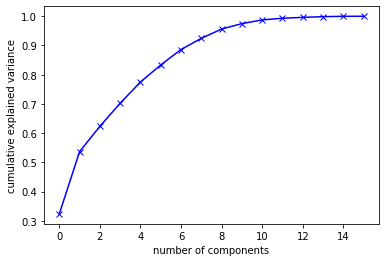

In [72]:
pca = PCA().fit(df_buy_try_standard)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bx-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

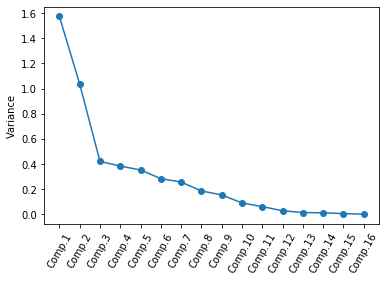

In [73]:
# https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#deciding-how-many-principal-components-to-retain

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, df_buy_try_standard)


In [74]:
## as per Kaiser's rule take comp where variance >1 so 5 components

In [75]:
pca.components_[0]

array([-2.53831666e-03,  2.30287336e-02, -3.36819243e-02,  5.51421376e-02,
        2.17830928e-02, -4.51443624e-02,  2.99952332e-02, -1.14279756e-02,
        1.21181484e-03,  8.21541188e-05,  3.89769752e-03,  2.30226422e-02,
        2.94491633e-03,  7.10572874e-01,  2.37694725e-01,  6.55574027e-01])

In [76]:
pca2= PCA(n_components=2)
pca2.fit(df_buy_try_standard)
df_pca2 = pca2.transform(df_buy_try_standard)
df_pca2

array([[-2.19622269e-01,  9.64454250e-03],
       [ 1.50354228e+00, -5.99477539e-01],
       [-8.30706769e-02, -1.73746762e-01],
       [-8.33019989e-01,  4.72274150e-01],
       [ 3.41859732e+00, -5.92363521e-01],
       [ 2.69641837e+00, -1.55452144e+00],
       [ 5.48769677e-01, -8.10749494e-01],
       [ 3.63068803e-01, -1.78384595e-02],
       [ 1.00061144e-01, -7.05114184e-02],
       [-3.79725914e-01,  1.85426464e-01],
       [-4.11111416e-01,  1.83209741e-01],
       [ 2.33930923e-01, -2.48589978e-01],
       [ 4.83259487e-01, -1.09783247e+00],
       [-2.76335321e-01, -7.46112015e-01],
       [-9.56142822e-01,  3.49296929e-01],
       [-1.28293662e+00,  4.45555434e-01],
       [ 3.52031222e-02,  6.12958278e-02],
       [ 4.29999299e+00, -4.38766921e-01],
       [ 9.76133470e-01,  2.28862249e-02],
       [ 1.09544437e+00, -7.79401984e-01],
       [ 1.46751089e+00,  5.43735101e+00],
       [ 1.50947820e+00, -5.00835918e-01],
       [ 1.96595884e-01,  7.05225045e-02],
       [ 1.

In [77]:
len(df_pca2)

500

## Buy + Try Elbow 1

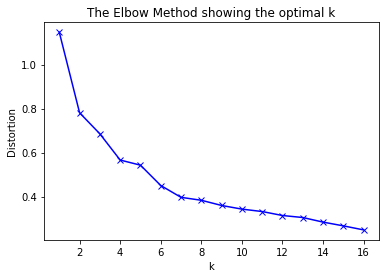

In [78]:
from sklearn import metrics
from scipy.spatial.distance import cdist

K = range(1,17)
distortions= []
for k in K:
    kmeansModel = KMeans(k)
    kmeansModel.fit(df_pca2)
    distortions.append(sum(np.min(cdist(df_pca2, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / df_pca2.shape[0])

    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [79]:
### K =4

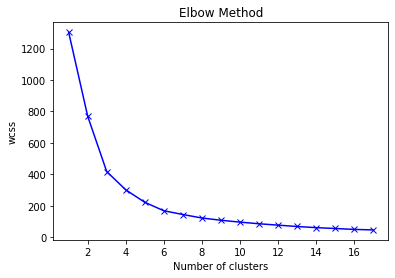

In [80]:
wcss = []
for i in range(1,18):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_pca2)
    wcss.append(km.inertia_)
plt.plot(range(1,18),wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

## KMeans clustering

In [81]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(n_clusters=nclust,init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    print (model.inertia_, model.score)
    return (clust_labels, cent)

#k=7
clust_labels2, cent2 = doKmeans(df_pca2, 2)
clust_labels3, cent3 = doKmeans(df_pca2, 3)
clust_labels4, cent4 = doKmeans(df_pca2, 4)
clust_labels5, cent5 = doKmeans(df_pca2, 5)
clust_labels6, cent6 = doKmeans(df_pca2, 6)
#clust_labels7, cent7 = doKmeans(df_pca, 7)
#clust_labels8, cent8 = doKmeans(df_pca, 8)

kmeans2 = pd.DataFrame(clust_labels2)
kmeans3 = pd.DataFrame(clust_labels3)
kmeans4 = pd.DataFrame(clust_labels4)
kmeans5 = pd.DataFrame(clust_labels5)
kmeans6 = pd.DataFrame(clust_labels6)



769.1642354554695 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)>
416.91192806034303 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)>
300.92985047948133 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)>
221.46326938676495 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)>
167.75910402599874 <bound method KMeans.s

In [82]:
df_kmeans_result= pd.DataFrame(df_pca2, columns=df_buy_try_standard.columns[:2])
df_kmeans_result['cluster2'] = kmeans2
df_kmeans_result['cluster3'] = kmeans3
df_kmeans_result['cluster4'] = kmeans4
df_kmeans_result['cluster5'] = kmeans5
df_kmeans_result['cluster6'] = kmeans6

df_kmeans_result.head()

,New Visitors Exists,Enter from Office.com,cluster2,cluster3,cluster4,cluster5,cluster6
0,-0.219622,0.009645,1,0,1,0,5
1,1.503542,-0.599478,0,1,0,2,1
2,-0.083071,-0.173747,1,0,1,0,5
3,-0.833020,0.472274,1,0,1,0,0
4,3.418597,-0.592364,0,1,3,1,4


In [83]:
df_kmeans_result.shape

(500, 7)

In [84]:
cent4

array([[ 0.71567097, -0.41957263],
       [-0.75134999,  0.14349243],
       [ 3.25775571,  6.06539046],
       [ 2.83034834, -0.90408084]])

In [85]:
df_centroid2 = pd.DataFrame(cent2, columns=df_buy_try_standard.columns[:7]) 
df_centroid2.head()

ValueError: Shape of passed values is (2, 2), indices imply (2, 7)

In [86]:
df_centroid2.to_csv("df_centroid2.csv")

NameError: name 'df_centroid2' is not defined

In [87]:
df_kmeans_result['cluster2'].unique()

array([1, 0])

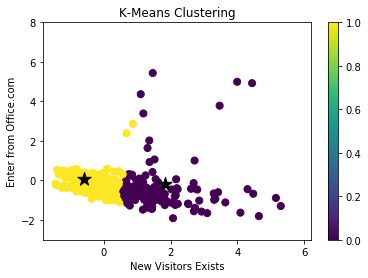

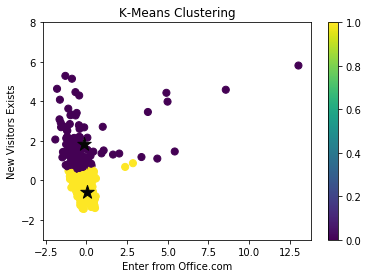

In [88]:
cols = df_kmeans_result.columns

#group = ("Paid Order", "Trial Order")

# plot from PCA
for cc in range(0,2):
    for r in range(0,2):
        if cc == r:
            continue
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_kmeans_result.iloc[:,cc],df_kmeans_result.iloc[:,r],
                     c=df_kmeans_result['cluster2'],s=50)
        #plt.ylim(-2, 20)
        ax.set_title('K-Means Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)
        plt.scatter(cent2[:, cc], cent2[:,r], marker='*', s=200, c='#050505')
        plt.ylim(-3,8)
        #plt.legend(df_kmeans_result['cluster2'].unique())
        

In [89]:
df_kmeans_result['cluster2'].value_counts()

1    379
0    121
Name: cluster2, dtype: int64

In [90]:
df_kmeans_result['cluster2_corrected'] = df_kmeans_result['cluster2'].apply(lambda x: 1 if x==0 else 0)
df_kmeans_result.head()

,New Visitors Exists,Enter from Office.com,cluster2,cluster3,cluster4,cluster5,cluster6,cluster2_corrected
0,-0.219622,0.009645,1,0,1,0,5,0
1,1.503542,-0.599478,0,1,0,2,1,1
2,-0.083071,-0.173747,1,0,1,0,5,0
3,-0.833020,0.472274,1,0,1,0,0,0
4,3.418597,-0.592364,0,1,3,1,4,1


In [91]:
y_hat = df['Paid Orders Exists']
len(y_hat)

500

## Measure accuracy

In [92]:
type(y_hat)

pandas.core.series.Series

In [93]:
y_pred = df_kmeans_result['cluster2']
type(y_pred)

pandas.core.series.Series

In [94]:
y_hat[y_hat.isna()]=0

/Users/sulbha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
y_hat= (y_hat.astype(int))
#print (y_pred)

In [96]:
y_hat.value_counts()

1    401
0     99
Name: Paid Orders Exists, dtype: int64

In [97]:
y_pred.value_counts()

1    379
0    121
Name: cluster2, dtype: int64

In [99]:
print (metrics.confusion_matrix(y_hat, y_pred))
print (metrics.classification_report(y_hat, y_pred))

[[ 18  81]
 [103 298]]
              precision    recall  f1-score   support

           0       0.15      0.18      0.16        99
           1       0.79      0.74      0.76       401

    accuracy                           0.63       500
   macro avg       0.47      0.46      0.46       500
weighted avg       0.66      0.63      0.65       500



In [100]:
print (metrics.homogeneity_score(y_hat, y_pred))
print (metrics.completeness_score(y_hat, y_pred))
print (metrics.adjusted_rand_score(y_hat, y_pred))
print (metrics.mutual_info_score(y_hat, y_pred))
#print (metrics.silhouette_score(y_hat, y_pred))


0.005143679219032404
0.004625411017305751
-0.03145742215245174
0.0025595837825072715


In [101]:
df_buy_mean = pd.DataFrame(df_buy_try[df_buy_try['cluster2']==0].mean())
df_buy_mean

NameError: name 'df_buy_try' is not defined

In [118]:
df_buy_mean.to_csv("df_buy_mean.csv")

In [119]:
df_try_mean = pd.DataFrame(df_buy_try[df_buy_try['cluster2']==1].mean())
df_try_mean
df_try_mean.to_csv("df_try_mean.csv")

In [111]:
df_buy_try[df_buy_try['cluster2_corrected']==1].agg( lambda x:x.value_counts().index[0])

Device Orders_Office                      0.000000
Total Visits                              1.000000
New Visitors                              1.000000
Enter PDP from Office.com                 0.000000
Enter PDP from Store                      0.000000
Enter PDP from O365 Web                   0.000000
Time Spent per Visit (seconds)          561.410606
Average Time Spent on Page (seconds)     86.627104
Link Clicks (e4)                         31.000000
Link Clicks on TechSpecsTab               0.000000
Link Clicks on ReviewTab                  0.000000
Link Clicks on FAQTab                     0.000000
Link Clicks on AddtoCartButton            0.000000
Link Clicks on Trial link                 0.000000
cluster2                                  0.000000
cluster2_corrected                        1.000000
dtype: float64

In [ ]:
len(df_buy_try['cluster2_corrected'])

In [ ]:
print (metrics.classification_report(y_hat, df_buy_try['cluster2_corrected']))

In [ ]:
print (metrics.confusion_matrix(y_hat, df_buy_try['cluster2_corrected']))

In [330]:
df[df['Paid Orders Exists']==1
  ].mean()

Paid Orders Exists                        1.000000
Free Orders Exists                        0.000000
Visits                                    1.000000
New Visitors Exists                       0.610973
Return Visitors Exists                    0.389027
Enter from Office.com                     0.052369
Enter from Store                          0.356608
Enter from O365 Web                       0.296758
Traffic Channel O&O                       0.364090
Traffic Channel Direct                    0.311721
Traffic Channel Organic Search            0.124688
Traffic Channel Paid Search               0.184539
Time Spent per Visit (seconds)          603.390746
Average Time Spent on Page (seconds)    112.851103
Link Clicks                              32.628429
Link Clicks on tab-OverviewTab            0.000000
Link Clicks on tab-TechSpecsTab           0.014963
Link Clicks on tab-ReviewsTab             0.002494
Link Clicks on tab-FAQTab                 0.009975
Link Clicks on AddToCartButton 

##  Agglomertive

In [102]:
df_standard_transform.drop(['agglomerative'], axis= 1, inplace=True)

NameError: name 'df_standard_transform' is not defined

In [103]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    print (model.affinity, model.connectivity)
    return (clust_labels1)

clust_labels2 = doAgglomerative(df_pca7, 2)
clust_labels3 = doAgglomerative(df_pca7, 3)
clust_labels4 = doAgglomerative(df_pca7, 4)

NameError: name 'df_pca7' is not defined

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df_pca6, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

In [ ]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
agglomerative = pd.DataFrame(clust_labels2)
df_buy_try.insert((df_buy_try.shape[1]),'agglomerative2',agglomerative)
df_buy_try.head()

df_buy_try['agglomerative2'].value_counts()

In [ ]:
df_buy_try['agglomerative2_corrected'] = df_buy_try['agglomerative2'].apply(lambda x: 1 if x ==0 else 0)
print (metrics.confusion_matrix(y_hat, df_buy_try['agglomerative2_corrected']))

In [ ]:
print (metrics.confusion_matrix(y_hat, df_buy_try['agglomerative2_corrected']))
print (metrics.classification_report(y_hat, df_buy_try['agglomerative2_corrected']))

In [ ]:
df_agglomerative_result= pd.DataFrame(df_pca7, columns=df_buy_try_standard.columns[:7])
df_agglomerative_result['cluster2'] = clust_labels2
df_agglomerative_result['cluster3'] = clust_labels3
df_agglomerative_result['cluster4'] = clust_labels4

df_agglomerative_result.head()

In [ ]:
cols = df_agglomerative_result.columns

# plot from PCA
for cc in range(0,7):
  for r in range(0,7):
        if cc == r:
            continue
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_agglomerative_result.iloc[:,cc],df_agglomerative_result.iloc[:,r],
                     c=df_agglomerative_result['cluster2'],s=50)
        plt.ylim(-2, 20)
        ax.set_title('Agglomerative Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)
        plt.ylim(-3,8)

In [ ]:
df_buy_try.head()